<a href="https://colab.research.google.com/github/patrickMazza/ML-Projects-22/blob/main/4aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Assignemt 4 Question 1
 #Patrick M, Alexa M
 from tensorflow import keras 
 import segmentation_models as sm


Segmentation Models: using `keras` framework.


In [ ]:
 keras.__version__

'2.9.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Input
from keras.datasets import mnist
(train_y , train_y), (test_x , test_y) = mnist.load_data ()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# This is the shape of the dataset
print(test_x.shape , test_y.shape)
print(train_x.shape , train_y.shape)
# This checks the pixel value
print(np.amax(train_x))

(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
255


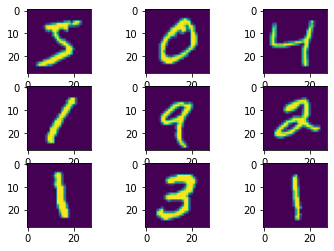

In [ ]:
for i in range(9):
   plt.subplot(330 + 1 + i)
   plt.imshow(train_x[i])
plt.show()

b) preprocessing

In [ ]:
def load_dataset():
    (train_x, train_y), (test_x, test_y) = mnist.load_data()

    num_classes = 10
    train_y = keras.utils.to_categorical(train_y, num_classes, dtype = int)
    test_y = keras.utils.to_categorical(test_y, num_classes, dtype = int
)
    #This reshapes the dataset to be able to work with
    train_x = np.reshape(train_x, [train_x.shape[0],28,28,1])
    test_x = np.reshape(test_x, [test_x.shape[0],28,28,1])

    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')

    # This normalizes our data
    train_x = np.divide(train_x, 255.0)
    test_x = np.divide(test_x, 255.0)

    return train_x, train_y, test_x, test_y

In [ ]:
train_x, train_y, test_x, test_y = load_dataset()

In [ ]:
# Checks the pixel scaling
print(np.amax(train_x[0]))

# Rechecking the shape
print(train_x[0].shape)
print(test_x.shape , test_y.shape)
print(train_x.shape , train_y.shape)

1.0
(28, 28, 1)
(10000, 28, 28, 1) (10000, 10)
(60000, 28, 28, 1) (60000, 10)


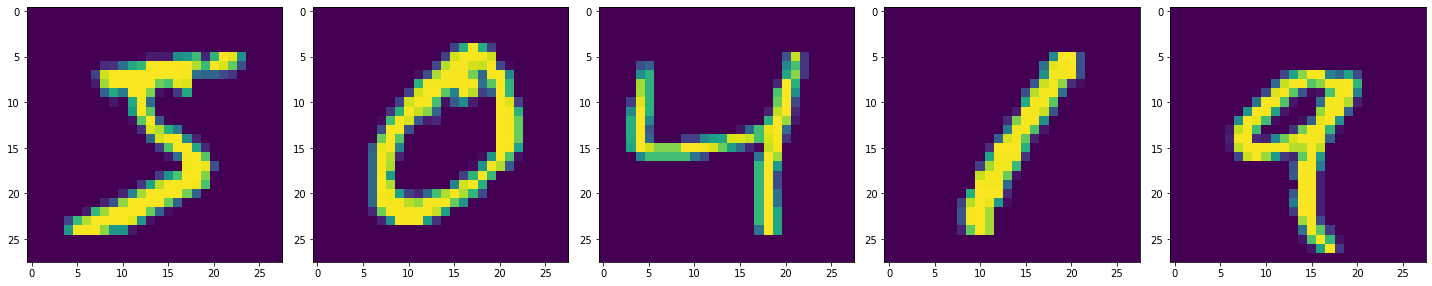

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,20)) 
axes = axes.flatten()
for img, ax in zip(train_x, axes):
    ax.imshow(img[:,:,0])
plt.tight_layout()
plt.show()

c) implimentations

In [ ]:
pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-jnbyt8xr
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-jnbyt8xr
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33809 sha256=6099b8ebb3c9a4f5177d73971065a2b74a55e149189dc78134fd93d460de0bf3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ui1mbn32/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.optimizers import SGD

def create_cnn() :
  # define model using Sequential
  model = Sequential()
  # Adding convolution layer
  model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1))) 
  # The Maxpooling layer 
  model.add(MaxPooling2D((2,2)))
  # Obtaining flat ten output
  model.add(Flatten())
  # Dense layer 100 neurons
  model.add(Dense(100, activation ='relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(10, activation ='softmax'))
  # initializes optimizer
  opt = SGD(lr = 0.01, momentum = 0.9)
  # compiles the model
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
  return model

In [ ]:
#Creates overall sequential model
model = create_cnn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               540900    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

d) training and evaluating CNN

In [ ]:
model.fit(train_x, train_y, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 35s 20ms/step - loss: 0.1907 - accuracy: 0.9414 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0624 - accuracy: 0.9815 - val_loss: 0.0554 - val_accuracy: 0.9848
Epoch 3/10
1688/1688 [==============================] - 35s 20ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0582 - val_accuracy: 0.9842
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0514 - val_accuracy: 0.9870
Epoch 6/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 7/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0464 -

In [ ]:
# We print the loss and test accuracy over the 10 epochs
loss, acc = model.evaluate(test_X, test_Y, verbose=0)
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 0.04288920760154724, Test Accuracy: 0.9886000156402588


e) Experimentation

i)

In [ ]:
epoch_history = model.fit(train_x, train_y, batch_size = 32, epochs = 50, validation_split = 0.1)

Epoch 1/50
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1752 - accuracy: 0.9460 - val_loss: 0.0770 - val_accuracy: 0.9782
Epoch 2/50
1688/1688 [==============================] - 63s 37ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0577 - val_accuracy: 0.9835
Epoch 3/50
1688/1688 [==============================] - 75s 45ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0528 - val_accuracy: 0.9873
Epoch 4/50
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0550 - val_accuracy: 0.9863
Epoch 5/50
1688/1688 [==============================] - 65s 39ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0525 - val_accuracy: 0.9882
Epoch 6/50
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0572 - val_accuracy: 0.9877
Epoch 7/50
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0618 -

In [ ]:
# This prints the overall validation and training accuracy over all epochs
print(epoch_history.history['accuracy'])
print(epoch_history.history['val_accuracy'])

[0.9459629654884338, 0.9835555553436279, 0.9912222027778625, 0.9954814910888672, 0.9977222084999084, 0.9991296529769897, 0.9998148083686829, 0.9999259114265442, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9781666398048401, 0.9835000038146973, 0.987333357334137, 0.9863333106040955, 0.9881666898727417, 0.987666666507721, 0.987666666507721, 0.9891666769981384, 0.9888333082199097, 0.9890000224113464, 0.9890000224113464, 0.9894999861717224, 0.9893333315849304, 0.9886666536331177, 0.9891666769981384, 0.9891666769981384, 0.9886666536331177, 0.9888333082199097, 0.9888333082199097, 0.9886666536331177, 0.9888333082199097, 0.9886666536331177, 0.9883333444595337, 0.9884999990463257, 0.9884999990463257, 0.9884999990463257, 0.9886666536331177, 0.9884999990463257, 0.9886666536331177, 0.9881666898727417, 0.9879999756813049, 0.988166689

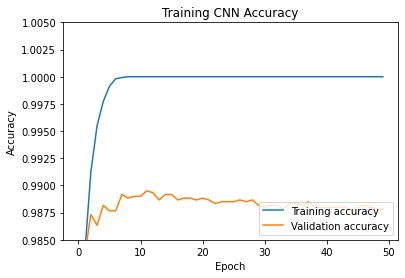

In [ ]:
plt.plot(epoch_history.history['accuracy'], label = 'Training accuracy')
plt.plot(epoch_history.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training CNN Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.985, 1.005])
plt.legend(loc = 'lower right')

In [ ]:
# This prints the overall loss and test accuracy over epochs
loss, acc = model.evaluate(test_x, test_y, verbose=0) 
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 0.07041120529174805, Test Accuracy: 0.9860000014305115


In [ ]:
from tensorflow.keras.layers import Dropout

# CNN with the dropout
def create_cnn1() :
    # define using Sequential 
    model = Sequential()

    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2))) # Flatten output
    model.add(Flatten()) 
    
    # The Dropout
    model.add(Dropout(0.5))

    # Dense layer 100 neurons
    model.add(Dense(100, activation ='relu', kernel_initializer = 'he_uniform'))

    model.add(Dense(10, activation ='softmax')) 
    # initializing the optimizer

    opt = SGD(lr = 0.01, momentum = 0.9)
    # compiling model

    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
#creates the CNN1
model = create_cnn1()

In [ ]:
epoch_history1 = model.fit(train_x, train_y, batch_size = 32, epochs = 50, validation_split = 0.1)

Epoch 1/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.2312 - accuracy: 0.9280 - val_loss: 0.0624 - val_accuracy: 0.9827
Epoch 2/50
1688/1688 [==============================] - 40s 23ms/step - loss: 0.0914 - accuracy: 0.9718 - val_loss: 0.0500 - val_accuracy: 0.9865
Epoch 3/50
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0458 - val_accuracy: 0.9882
Epoch 4/50
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0532 - accuracy: 0.9827 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 5/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0463 - accuracy: 0.9839 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 6/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 7/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0369 -

In [ ]:
# prints the validation and training accuracy over the epochs
print(epoch_history1.history['accuracy'])
print(epoch_history1.history['val_accuracy'])

[0.9279814958572388, 0.9717962741851807, 0.9797407388687134, 0.982703685760498, 0.9838703870773315, 0.9859444499015808, 0.9884259104728699, 0.9893333315849304, 0.9909444451332092, 0.9914259314537048, 0.9922962784767151, 0.9920926094055176, 0.993314802646637, 0.9939444661140442, 0.9940000176429749, 0.9942036867141724, 0.9947407245635986, 0.9946481585502625, 0.9957407116889954, 0.9956481456756592, 0.9961851835250854, 0.9958333373069763, 0.9963148236274719, 0.9960926175117493, 0.9964444637298584, 0.9964629411697388, 0.9967407584190369, 0.9966852068901062, 0.9969815015792847, 0.9974074363708496, 0.9972222447395325, 0.997259259223938, 0.9975185394287109, 0.9973148107528687, 0.9977407455444336, 0.9975000023841858, 0.9972037076950073, 0.9974074363708496, 0.9980185031890869, 0.9979629516601562, 0.9982407689094543, 0.9980555772781372, 0.9979259371757507, 0.9981296062469482, 0.9980000257492065, 0.9980185031890869, 0.9982407689094543, 0.9981296062469482, 0.9984814524650574, 0.9980925917625427]
[0

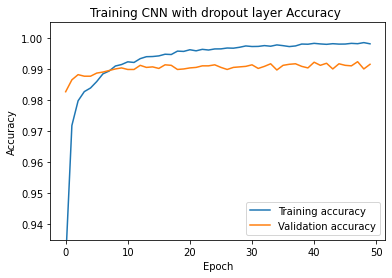

In [ ]:
# prints the validation and training accuracy over the epochs
plt.plot(epoch_history1.history['accuracy'], label = 'Training accuracy')
plt.plot(epoch_history1.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training CNN with dropout layer Accuracy ")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.935, 1.005])
plt.legend(loc = 'lower right')

In [ ]:
# print loss and test accuracy over epochs
loss, acc = model.evaluate(test_x, test_y, verbose=0) 
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 0.03739070147275925, Test Accuracy: 0.9909999966621399


iii.

In [ ]:
# The CNN with two convolution layers
def create_cnn2() :
    # defining using Sequential 
    model = Sequential()

    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    
    # Addes new Convolution layer
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))

    # New Maxpooling layer
    model.add(MaxPooling2D((2,2))) # Flatten output
    model.add(Flatten())
     # The Dropout
    model.add(Dropout(0.5))
    # Dense layer 100 neurons
    model.add(Dense (100, activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation ='softmax')) # initialize optimizer
    opt = SGD(lr = 0.01, momentum = 0.9)
    # compiles the model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
#Creates the second CNN model
model = create_cnn2()

In [ ]:
epoch_history2 = model.fit(train_x, train_y, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 57s 33ms/step - loss: 0.1973 - accuracy: 0.9378 - val_loss: 0.0592 - val_accuracy: 0.9818
Epoch 2/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0780 - accuracy: 0.9753 - val_loss: 0.0440 - val_accuracy: 0.9877
Epoch 3/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0619 - accuracy: 0.9801 - val_loss: 0.0328 - val_accuracy: 0.9912
Epoch 4/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 5/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 6/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0304 - val_accuracy: 0.9923
Epoch 7/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0358 - accuracy: 0.9881 - val_loss: 0.0281 -

In [ ]:
# prints overall validation and training accuracy over epochs
print(epoch_history2.history['accuracy'])
print(epoch_history2.history['val_accuracy'])

[0.9377777576446533, 0.9753147959709167, 0.9801296591758728, 0.9835740923881531, 0.9857407212257385, 0.9872592687606812, 0.9881296157836914, 0.9889444708824158, 0.9899444580078125, 0.990240752696991]
[0.9818333387374878, 0.987666666507721, 0.9911666512489319, 0.9893333315849304, 0.9906666874885559, 0.9923333525657654, 0.9926666617393494, 0.9923333525657654, 0.9928333163261414, 0.9929999709129333]


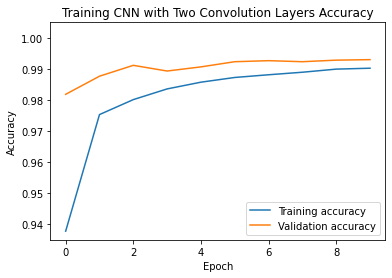

In [ ]:
# plot validation and training accuracy over epochs
plt.plot(epoch_history2.history['accuracy'], label = 'Training accuracy')
plt.plot(epoch_history2.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training CNN with Two Convolution Layers Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.935, 1.005])
plt.legend(loc = 'lower right')

In [ ]:
# print loss and test accuracy over epochs
loss, acc = model.evaluate(test_x, test_y, verbose=0) 
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 0.023197347298264503, Test Accuracy: 0.9921000003814697


In [ ]:
# New CNN with the lr = 0.001
def create_cnn3() :
    # defines using Sequential 
    model = Sequential()

    # Adding Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    # Adding Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Adding New Convolution layer
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    # Adding New Maxpooling layer
    model.add(MaxPooling2D((2,2))) 
    # The Flatten output
    model.add(Flatten()) 
    # The Dropout
    model.add(Dropout(0.5))
    # Dense layer 100 neurons
    model.add(Dense (100, activation ='relu', kernel_initializer = 'he_uniform'))

    model.add(Dense(10, activation ='softmax'))
    # initializes the optimizer
    opt = SGD(lr = 0.001, momentum = 0.9)
    # compiles the model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
    return model

In [ ]:
# Creates the third CNN
model = create_cnn3()

In [ ]:
epoch_history3 = model.fit(train_x, train_y, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 57s 33ms/step - loss: 0.4210 - accuracy: 0.8670 - val_loss: 0.0976 - val_accuracy: 0.9722
Epoch 2/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1593 - accuracy: 0.9513 - val_loss: 0.0727 - val_accuracy: 0.9805
Epoch 3/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1233 - accuracy: 0.9625 - val_loss: 0.0603 - val_accuracy: 0.9833
Epoch 4/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1035 - accuracy: 0.9671 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 5/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0914 - accuracy: 0.9714 - val_loss: 0.0531 - val_accuracy: 0.9860
Epoch 6/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 7/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0440 -

In [ ]:
# prints the validation and training accuracy over the epochs
print(epoch_history3.history['accuracy'])
print(epoch_history3.history['val_accuracy'])

[0.8670185208320618, 0.9513148069381714, 0.9624999761581421, 0.9670925736427307, 0.9713888764381409, 0.9735925793647766, 0.9764259457588196, 0.9779258966445923, 0.9788333177566528, 0.980388879776001]
[0.9721666574478149, 0.9804999828338623, 0.9833333492279053, 0.9848333597183228, 0.9860000014305115, 0.9865000247955322, 0.9881666898727417, 0.9881666898727417, 0.987333357334137, 0.9883333444595337]


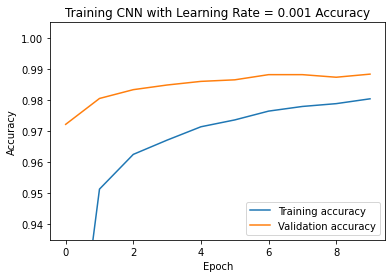

In [ ]:
# This plots the validation and training accuracy over the epochs
plt.plot(epoch_history3.history['accuracy'], label = 'Training accuracy'
)
plt.plot(epoch_history3.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training CNN with Learning Rate = 0.001 Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.935, 1.005])
plt.legend(loc = 'lower right')

In [ ]:
# print loss and test accuracy over epochs
loss, acc = model.evaluate(test_x, test_y, verbose=0) 
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 0.03634905442595482, Test Accuracy: 0.9879000186920166


In [ ]:
# Creating new CNN with lr = 0.1
def create_cnn4() :
    # defines using Sequential 
    
    model = Sequential()
    # Adds Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    # Adds Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Adds New Convolution layer
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer= 'he_uniform', input_shape = (28, 28, 1)))
    # Adds New Maxpooling layer
    model.add(MaxPooling2D((2,2))) # Flatten output
    model.add(Flatten()) 
    # The Dropout
    model.add(Dropout(0.5))
    # Dense layer  100 neurons
    model.add(Dense (100, activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation ='softmax'))
    # initializes the optimizer
    opt = SGD(lr = 0.1, momentum = 0.9)
    # compiles the model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
    return model

In [ ]:
#Ccreates the fourth CNN
model = create_cnn4()

In [ ]:
epoch_history4 = model.fit(train_x, train_y, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.9793 - accuracy: 0.7265 - val_loss: 1.0120 - val_accuracy: 0.6475
Epoch 2/10
1688/1688 [==============================] - 55s 32ms/step - loss: 1.6659 - accuracy: 0.4279 - val_loss: 2.3048 - val_accuracy: 0.1045
Epoch 3/10
1688/1688 [==============================] - 54s 32ms/step - loss: 2.4489 - accuracy: 0.1058 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 4/10
1688/1688 [==============================] - 54s 32ms/step - loss: 2.3086 - accuracy: 0.1032 - val_loss: 2.3046 - val_accuracy: 0.1113
Epoch 5/10
1688/1688 [==============================] - 63s 37ms/step - loss: 2.3087 - accuracy: 0.1044 - val_loss: 2.3094 - val_accuracy: 0.0952
Epoch 6/10
1688/1688 [==============================] - 56s 33ms/step - loss: 2.3085 - accuracy: 0.1047 - val_loss: 2.3073 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 60s 36ms/step - loss: 2.3079 - accuracy: 0.1063 - val_loss: 2.3072 -

In [ ]:
# prints the validation and training accuracy over the epochs
print(epoch_history4.history['accuracy'])
print(epoch_history4.history['val_accuracy'])

[0.7265185117721558, 0.4279259145259857, 0.10579629987478256, 0.10324074327945709, 0.10435184836387634, 0.10474073886871338, 0.10629629343748093, 0.10253703594207764, 0.10442592948675156, 0.10418518632650375]
[0.6474999785423279, 0.10450000315904617, 0.10000000149011612, 0.11133333295583725, 0.09516666829586029, 0.10499999672174454, 0.11133333295583725, 0.09916666895151138, 0.11133333295583725, 0.11133333295583725]


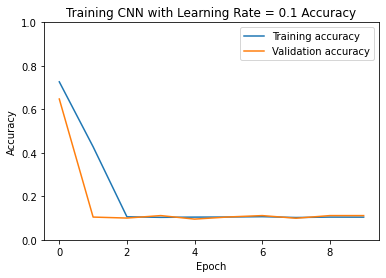

In [ ]:
# plots the validation and training accuracy over the epochs
plt.plot(epoch_history4.history['accuracy'], label = 'Training accuracy'
)
plt.plot(epoch_history4.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training CNN with Learning Rate = 0.1 Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc = 'upper right')

In [ ]:
# This prints the loss and test accuracy over the epochs
loss, acc = model.evaluate(test_X, test_Y, verbose=0) 
print(f'Loss: {loss}, Test Accuracy: {acc}')

Loss: 2.305126190185547, Test Accuracy: 0.10279999673366547


f) Analysis

In [ ]:
# This trains the accuracy and validation accuracy for basic CNN
print(epoch_history.history['accuracy'])
print(epoch_history.history['val_accuracy'])

[0.9459629654884338, 0.9835555553436279, 0.9912222027778625, 0.9954814910888672, 0.9977222084999084, 0.9991296529769897, 0.9998148083686829, 0.9999259114265442, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9781666398048401, 0.9835000038146973, 0.987333357334137, 0.9863333106040955, 0.9881666898727417, 0.987666666507721, 0.987666666507721, 0.9891666769981384, 0.9888333082199097, 0.9890000224113464, 0.9890000224113464, 0.9894999861717224, 0.9893333315849304, 0.9886666536331177, 0.9891666769981384, 0.9891666769981384, 0.9886666536331177, 0.9888333082199097, 0.9888333082199097, 0.9886666536331177, 0.9888333082199097, 0.9886666536331177, 0.9883333444595337, 0.9884999990463257, 0.9884999990463257, 0.9884999990463257, 0.9886666536331177, 0.9884999990463257, 0.9886666536331177, 0.9881666898727417, 0.9879999756813049, 0.988166689

In [ ]:
# This trains the accuracy and validation accuracy for CNN with dropout layer
print(epoch_history1.history['accuracy'])
print(epoch_history1.history['val_accuracy'])

[0.9279814958572388, 0.9717962741851807, 0.9797407388687134, 0.982703685760498, 0.9838703870773315, 0.9859444499015808, 0.9884259104728699, 0.9893333315849304, 0.9909444451332092, 0.9914259314537048, 0.9922962784767151, 0.9920926094055176, 0.993314802646637, 0.9939444661140442, 0.9940000176429749, 0.9942036867141724, 0.9947407245635986, 0.9946481585502625, 0.9957407116889954, 0.9956481456756592, 0.9961851835250854, 0.9958333373069763, 0.9963148236274719, 0.9960926175117493, 0.9964444637298584, 0.9964629411697388, 0.9967407584190369, 0.9966852068901062, 0.9969815015792847, 0.9974074363708496, 0.9972222447395325, 0.997259259223938, 0.9975185394287109, 0.9973148107528687, 0.9977407455444336, 0.9975000023841858, 0.9972037076950073, 0.9974074363708496, 0.9980185031890869, 0.9979629516601562, 0.9982407689094543, 0.9980555772781372, 0.9979259371757507, 0.9981296062469482, 0.9980000257492065, 0.9980185031890869, 0.9982407689094543, 0.9981296062469482, 0.9984814524650574, 0.9980925917625427]
[0

The results we recieved for the CNN's were that when we did not use a dropout layer, the training accuracy was extremly close to the value of 1 and would reach 1. When we did use the dropout layer, trends in the validation accuracy and accuracy incresed in the direction towards 1 but did't reach 1. The Trends of the validation accuracy were very close in value although, the use of the dropout layer resulted in better validation accuracy.


ii)

In [ ]:
# train accuracy and validation accuracy for CNN with dropout layer (lr = 0.01)
print(epoch_history1.history['accuracy'])
print(epoch_history1.history['val_accuracy'])

[0.9279814958572388, 0.9717962741851807, 0.9797407388687134, 0.982703685760498, 0.9838703870773315, 0.9859444499015808, 0.9884259104728699, 0.9893333315849304, 0.9909444451332092, 0.9914259314537048, 0.9922962784767151, 0.9920926094055176, 0.993314802646637, 0.9939444661140442, 0.9940000176429749, 0.9942036867141724, 0.9947407245635986, 0.9946481585502625, 0.9957407116889954, 0.9956481456756592, 0.9961851835250854, 0.9958333373069763, 0.9963148236274719, 0.9960926175117493, 0.9964444637298584, 0.9964629411697388, 0.9967407584190369, 0.9966852068901062, 0.9969815015792847, 0.9974074363708496, 0.9972222447395325, 0.997259259223938, 0.9975185394287109, 0.9973148107528687, 0.9977407455444336, 0.9975000023841858, 0.9972037076950073, 0.9974074363708496, 0.9980185031890869, 0.9979629516601562, 0.9982407689094543, 0.9980555772781372, 0.9979259371757507, 0.9981296062469482, 0.9980000257492065, 0.9980185031890869, 0.9982407689094543, 0.9981296062469482, 0.9984814524650574, 0.9980925917625427]
[0

In [ ]:
#  validation accuracy and training accuracy for the CNN with dropout layer with the two convolutional layers which was (lr = 0.01) 
print(epoch_history2.history['accuracy']) 
print(epoch_history2.history['val_accuracy'])

[0.9377777576446533, 0.9753147959709167, 0.9801296591758728, 0.9835740923881531, 0.9857407212257385, 0.9872592687606812, 0.9881296157836914, 0.9889444708824158, 0.9899444580078125, 0.990240752696991]
[0.9818333387374878, 0.987666666507721, 0.9911666512489319, 0.9893333315849304, 0.9906666874885559, 0.9923333525657654, 0.9926666617393494, 0.9923333525657654, 0.9928333163261414, 0.9929999709129333]


The overall preformance of our CNN with the two convolutional layers had a higher validation accuracy and a slightly lower train accuracy in comparison with the single convolutional layer

iii)

In [ ]:
# The validation accuracy and train accuracy for the CNN with dropout layer of the two convolutional layers which was (lr = 0.01) 
print(epoch_history2.history['accuracy']) 
print(epoch_history2.history['val_accuracy'])

[0.9377777576446533, 0.9753147959709167, 0.9801296591758728, 0.9835740923881531, 0.9857407212257385, 0.9872592687606812, 0.9881296157836914, 0.9889444708824158, 0.9899444580078125, 0.990240752696991]
[0.9818333387374878, 0.987666666507721, 0.9911666512489319, 0.9893333315849304, 0.9906666874885559, 0.9923333525657654, 0.9926666617393494, 0.9923333525657654, 0.9928333163261414, 0.9929999709129333]


In [ ]:
# The validation accuracy and train accuracy for the CNN with dropout layer of the two convolutional layers which was (lr = 0.001) 
print(epoch_history3.history['accuracy']) 
print(epoch_history3.history['val_accuracy'])

[0.8670185208320618, 0.9513148069381714, 0.9624999761581421, 0.9670925736427307, 0.9713888764381409, 0.9735925793647766, 0.9764259457588196, 0.9779258966445923, 0.9788333177566528, 0.980388879776001]
[0.9721666574478149, 0.9804999828338623, 0.9833333492279053, 0.9848333597183228, 0.9860000014305115, 0.9865000247955322, 0.9881666898727417, 0.9881666898727417, 0.987333357334137, 0.9883333444595337]


In [ ]:
# The validation accuracy and train accuracy for the CNN with dropout layer of the two convolutional layers which was (lr = 0.1) 
print(epoch_history4.history['accuracy']) 
print(epoch_history4.history['val_accuracy'])

[0.7265185117721558, 0.4279259145259857, 0.10579629987478256, 0.10324074327945709, 0.10435184836387634, 0.10474073886871338, 0.10629629343748093, 0.10253703594207764, 0.10442592948675156, 0.10418518632650375]
[0.6474999785423279, 0.10450000315904617, 0.10000000149011612, 0.11133333295583725, 0.09516666829586029, 0.10499999672174454, 0.11133333295583725, 0.09916666895151138, 0.11133333295583725, 0.11133333295583725]


When we would change the learning rates to 0.1, both the validation accuracy and the train accuracy dropped to 0.1. When we changed the learning rates to 0.001, this gave us a lower overall validation accuracy and trainning accuracy.